# Classifying Newswires Exercise

## Decoding the Data

In [2]:
from tensorflow.keras.datasets import reuters

sample_newswire = reuters.load_data()[0][0][2]

word_index = reuters.get_word_index()
reversed_index = dict([(value, key) for (key, value) in word_index.items()])


decoded_newswire = " ".join([reversed_index.get(i - 3, "|") for i in sample_newswire[:-2]])

print(decoded_newswire)


| shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in enron corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national intergroup inc of 11 8 mln and brae corp of 15 6 mln


## Ran some tests. Identified the most efficient architecture.

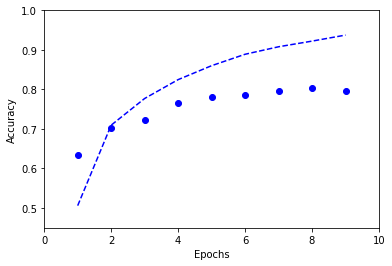

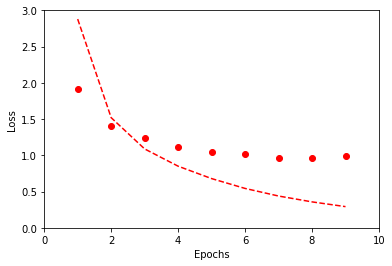

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import reuters


def plot_accuracy(history, save_path="graph.png"):

    import matplotlib.pyplot as plt

    plt.clf()

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(1, len(accuracy) + 1)

    plt.axis([0, 10, 0.45, 1])
    plt.plot(epochs, val_accuracy, "bo", label="Validation Accuracy")
    plt.plot(epochs, accuracy, "b--", label="Accuracy")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    plt.savefig(save_path)
    plt.show()
    plt.clf()


def plot_loss(history, save_path="graph.png"):

    import matplotlib.pyplot as plt

    plt.clf()

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    plt.axis([0, 10, 0, 3])
    plt.plot(epochs, loss, "r--", label="Loss")
    plt.plot(epochs, val_loss, "ro", label="Validation Loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.savefig(save_path)
    plt.show()
    plt.clf()


def to_one_hot(labels, dimension=46):

    import numpy as np

    result_vector_set = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        result_vector_set[i, label] = 1

    return result_vector_set


def vectorize_sequences(sequences, dimension=10000):

    import numpy as np

    result_vector_set = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        result_vector_set[i, sequence] = 1

    return result_vector_set


(train_data, train_labels) = reuters.load_data(num_words=10000)[0]


x_train = vectorize_sequences(train_data)
one_hot_train_labels = to_one_hot(train_labels)

x_train_val = x_train[:1500]
x_train_part = x_train[1500:]

y_labels_val = one_hot_train_labels[:1500]
y_labels_part = one_hot_train_labels[1500:]

hidden_units = [64, 64]
for units in hidden_units:
    network_architecture = "-".join(map(str, hidden_units))

network = models.Sequential()
network.add(layers.Dense(hidden_units[0], activation="relu", input_shape=(10000,)))
network.add(layers.Dense(hidden_units[1], activation="relu"))
network.add(layers.Dense(46, activation="softmax"))

network.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

history = network.fit(
    x_train_part,
    y_labels_part,
    batch_size=512,
    epochs=9,
    verbose=0,
    validation_data=(x_train_val, y_labels_val),
)

save_path = "testing_res/Accuracy/input()-" + network_architecture + "-46.png"
plot_accuracy(history, save_path)

save_path = "testing_res/Loss/input()-" + network_architecture + "-46.png"
plot_loss(history, save_path)


## Training of the Neural Network

In [8]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import reuters


def vectorize(Sequences, dimension=10000):
    import numpy as np

    result_vector_set = np.zeros((len(Sequences), dimension))

    for i, Sequence in enumerate(Sequences):
        result_vector_set[i, Sequence] = 1

    return result_vector_set


def to_one_hot(lables, dimension=46):
    import numpy as np

    result_vector_set = np.zeros((len(lables), dimension))

    for i, label in enumerate(lables):
        result_vector_set[i, label] = 1

    return result_vector_set


(train_data, train_labels) = reuters.load_data(num_words=10000)[0]

x_train = vectorize(train_data)
y_labels = to_one_hot(train_labels)

network_arch = [64, 64, 46]
network = models.Sequential()
network.add(layers.Dense(network_arch[0], activation="relu", input_shape=(10000,)))
network.add(layers.Dense(network_arch[1], activation="relu"))
network.add(layers.Dense(network_arch[2], activation="softmax"))

network.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

network.fit(x_train, y_labels, batch_size=512, epochs=9)

network.save("trained_network.h5")


Epoch 1/9
18/18 [==============================] - 1s 30ms/step - loss: 2.6171 - accuracy: 0.5145
Epoch 2/9
18/18 [==============================] - 1s 30ms/step - loss: 1.3996 - accuracy: 0.7053
Epoch 3/9
18/18 [==============================] - 1s 33ms/step - loss: 1.0440 - accuracy: 0.7751
Epoch 4/9
18/18 [==============================] - 1s 32ms/step - loss: 0.8191 - accuracy: 0.8236
Epoch 5/9
18/18 [==============================] - 1s 33ms/step - loss: 0.6501 - accuracy: 0.8638
Epoch 6/9
18/18 [==============================] - 1s 35ms/step - loss: 0.5220 - accuracy: 0.8937
Epoch 7/9
18/18 [==============================] - 1s 30ms/step - loss: 0.4233 - accuracy: 0.9117
Epoch 8/9
18/18 [==============================] - 1s 29ms/step - loss: 0.3446 - accuracy: 0.9273
Epoch 9/9
18/18 [==============================] - 1s 31ms/step - loss: 0.2920 - accuracy: 0.9373


## Testing the Network

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import reuters


def vectorize(Sequences, dimension=10000):
    import numpy as np

    result_vector_set = np.zeros((len(Sequences), dimension))

    for i, sequence in enumerate(Sequences):
        result_vector_set[i, sequence] = 1

    return result_vector_set


def to_one_hot(Labels, dimension=46):
    import numpy as np

    result_vector_set = np.zeros((len(Labels), dimension))

    for i, label in enumerate(Labels):
        result_vector_set[i, label] = 1

    return result_vector_set


(test_data, test_labels) = reuters.load_data(num_words=10000)[1]

x_test = vectorize(test_data)
y_test_labels = to_one_hot(test_labels)

network = load_model("trained_network.h5")

network.evaluate(x_test, y_test_labels)


71/71 [==============================] - 0s 3ms/step - loss: 0.9766 - accuracy: 0.7850


[0.9766201376914978, 0.7849510312080383]